<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/9_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA_of_%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_10_%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8_%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B9_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Простой автоэнкодер


In [0]:
from tensorflow.keras.datasets import fashion_mnist # загружаем готовую базу mnist(fashion- с одеждой, обувью и т.п)
import numpy as np # загружаем библиотеку для работы с массивами данных

#(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # загружаем данные из базы с разбивкой на train/test
x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.datasets import mnist # загружаем готовую стандартную базу рукописных цифр mnist
import numpy as np # загружаем библиотеку для работы с массивами данных

(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test

x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import seaborn as sns # более высокоуровневое API на базе библиотеки matplotlib
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций

def plot_digits(*args): # функция отрисует две линии картинок - оригинальные и выходные из автокодировщика
    args = [x.squeeze() for x in args] # удаляем оси с одним элементом из аргументов
    n = min([x.shape[0] for x in args]) # берем минимальное от нулевой оси x'ов в аргументах
    
    plt.figure(figsize=(2*n, 2*len(args))) # плотим фигуру с заданными значениями
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1) # задаем параметры и создаем сабплоты
            plt.imshow(args[i][j]) # выведем картинку
            plt.gray() # в черно-белых цветах 
            ax.get_xaxis().set_visible(False) # ось координат xaxis делаем невидимой
            ax.get_yaxis().set_visible(False) # ось координат yaxis делаем невидимой

    plt.show() # выводим отрисованное на экран

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape # загружаем необходимые слои
from tensorflow.keras.models import Model # загружаем абстрактный класс базовой модели сети от кераса

def create_dense_ae(): # объявляем функцию создания автокодировщика
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,)) # задаем входную размерность (49,)
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded) # далее полносвязный слой на 784 нейрона
    decoded = Reshape((28, 28, 1))(flat_decoded) # меняем форму, приводим к нужным нам размерам

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    
    decoder = Model(input_encoded, decoded, name="decoder")
    
    # Построим модель автокодировщика (внутри двойное преобразование - сжатие/разжатие)
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder # функция вернет 3 собранные сетки

In [0]:
encoder, decoder, autoencoder = create_dense_ae() # создаем три сетки с помощью заданной ранее функции
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # компилируем модель с выбранным оптимайзером и функцией потерь 

In [0]:
autoencoder.summary() # взглянем на информацию о полученной модели автокодировщика

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 49)                38465     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [0]:
decoder.summary() # отдельно взглянем на информацию о декодере

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39200     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 39,200
Trainable params: 39,200
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)) # грузим наши данные в модель, задаем параметры и обучаем

Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.2576 - val_loss: 0.1739
Epoch 2/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1544 - val_loss: 0.1371
Epoch 3/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1289 - val_loss: 0.1186
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1136 - val_loss: 0.1061
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1034 - val_loss: 0.0982
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0964 - val_loss: 0.0919
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0912 - val_loss: 0.0877
Epoch 8/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0874 - val_loss: 0.0846
Epoch 9/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0849 - val_loss: 0.0826
Epoch 10/25
235/235 [==============================] - 1s 3ms/step - loss: 0.0832 - val_loss: 0.0813

In [0]:
n = 10 # выбираем количество картинок
imgs = x_test[:n] # взяли первые 10 от x_test
encoded_imgs = encoder.predict(imgs, batch_size=n) # перевели их энкодером в скрытое пространство
encoded_imgs[1] # взглянем на форму выбранной картинки в скрытом пространстве

array([ 5.9016547,  5.4880924, 10.671319 , 11.466835 ,  1.1883907,
       10.638081 ,  9.2998495, 10.687809 ,  6.454737 ,  3.1432922,
        5.258876 ,  8.802423 , 14.189078 ,  9.307783 ,  2.9550567,
        5.6611214,  7.050239 ,  5.0470953,  2.922504 ,  7.6155944,
       12.879378 ,  6.1974554,  7.6634197,  5.666657 ,  8.05792  ,
       11.42976  ,  0.       , 10.255039 ,  5.9357386,  3.6665654,
       18.359945 , 11.856958 ,  2.0792599,  7.3447623,  6.6361237,
        4.595411 , 16.557236 , 10.079827 ,  5.4564285,  4.9822836,
        1.8740723, 10.836696 ,  7.3953958,  9.028002 ,  6.0852895,
        7.40683  , 13.26696  ,  7.249554 ,  3.418913 ], dtype=float32)

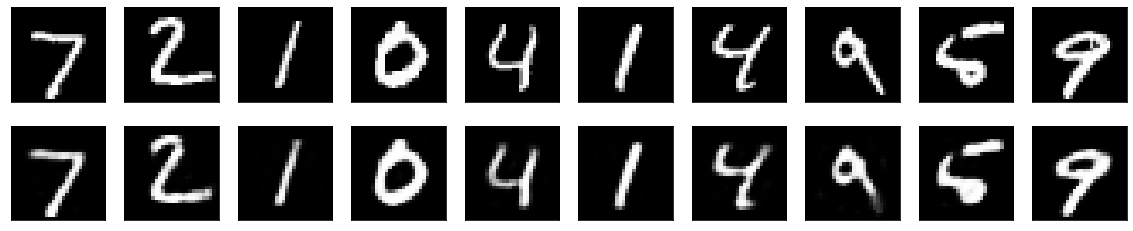

In [0]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n) # делаем преобразование этих картинок декодером

plot_digits(imgs, decoded_imgs) # взглянем как преобразовал картинки обычный автокодировщик

#Сверточный автоэнкодер


In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose # загружаем слои для свертки

def create_deep_conv_ae(): # объявляем функцию создания глубокого сверточного автокодировщика
    input_img = Input(shape=(28, 28, 1)) # размерности строк, столбцов, фильтров одной картинки, без батч-размерности

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img) # входные данные передаем на слой двумерной свёртки
    x = MaxPooling2D((2, 2), padding='same')(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x) # второй слой двумерной свёртки
    x = MaxPooling2D((2, 2), padding='same')(x) # второй слой подвыборки
    
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x) # финальный слой свертки энкодера. Сжали в пространство 7на7

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1)) # задаем эти размеры как входные в декодер
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded) # входные данные передаем на слой двумерной свёртки
    x = UpSampling2D((2, 2))(x)  # Conv2DTranspose. Cлой разжимает данные, стало 14на14
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x) # второй слой двумерной свёртки
    x = UpSampling2D((2, 2))(x) # второй слой разжатия данных, стало 28на28
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x) # финальный слой свертки энкодера

    # Модели
    encoder = Model(input_img, encoded, name="encoder") # задаем модель энкодера(сжатие картинки)
    decoder = Model(input_encoded, decoded, name="decoder") # задаем модель декодера(разжатие картинки)
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder") # задаем модель автокодировщика(сжатие-разжатие)
    return encoder, decoder, autoencoder # функция возвращает 3 сетки

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae() # создаем три сетки с помощью заданной ранее функции
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # компилируем модель с выбранным оптимайзером и функцией потерь

c_autoencoder.summary() # взглянем на информацию о полученной модели сверточного автокодировщика

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 7, 7, 1)           24385     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         24385     
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
c_decoder.summary() # отдельно взглянем на информацию о декодере

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 7, 7, 1)]         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          1600      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       16512     
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 1)         6273      
Total params: 24,385
Trainable params: 24,385
Non-trainable params: 0
_______________________________________________________

In [0]:
c_autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)) # грузим наши данные в модель, задаем параметры и обучаем

Epoch 1/15
235/235 [==============================] - 16s 66ms/step - loss: 0.1792 - val_loss: 0.1028
Epoch 2/15
235/235 [==============================] - 15s 64ms/step - loss: 0.0961 - val_loss: 0.0891
Epoch 3/15
235/235 [==============================] - 15s 64ms/step - loss: 0.0875 - val_loss: 0.0832
Epoch 4/15
235/235 [==============================] - 15s 64ms/step - loss: 0.0835 - val_loss: 0.0808
Epoch 5/15
235/235 [==============================] - 15s 65ms/step - loss: 0.0813 - val_loss: 0.0791
Epoch 6/15
235/235 [==============================] - 15s 65ms/step - loss: 0.0796 - val_loss: 0.0775
Epoch 7/15
235/235 [==============================] - 15s 65ms/step - loss: 0.0785 - val_loss: 0.0793
Epoch 8/15
235/235 [==============================] - 15s 65ms/step - loss: 0.0776 - val_loss: 0.0758
Epoch 9/15
235/235 [==============================] - 15s 65ms/step - loss: 0.0769 - val_loss: 0.0751
Epoch 10/15
235/235 [==============================] - 15s 64ms/step - loss: 0.076

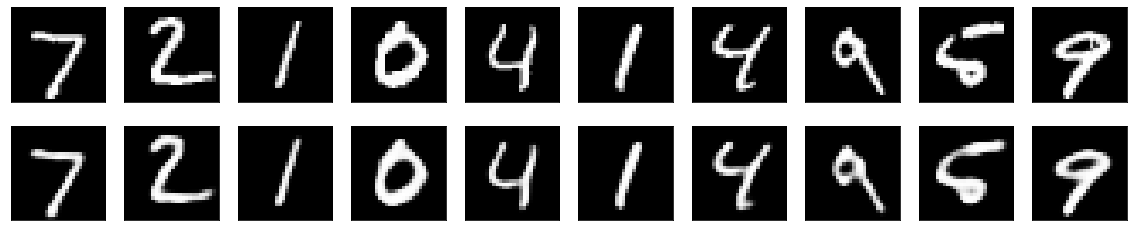

In [0]:
n = 10 # выбираем количество картинок

imgs = x_test[:n] # взяли первые 10 от x_test
encoded_imgs = c_encoder.predict(imgs, batch_size=n) # делаем преобразование энкодером
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n) # делаем преобразование декодером

plot_digits(imgs, decoded_imgs) # взглянем как преобразовал картинки сверточный автокодировщик

#Почему автоэнкодеры не используют для генерации изображений


In [0]:
def add_noise(x,k): # создаем функцию добавления шума
  x = x + k*np.random.normal(0, 1, x.shape) # получили x и прибавили к нему какое-то numpy нормальное распределение от 0 до 1
  return x # функция вернет x с добавлением шума

def add_img_func(x1,x2,k): # создаем функцию смешения картинок
  x = x1*k + x2*(1-k) # смешиваем x1 с коэф-том k, и x2 с коэф-том (1-k)
  return x # функция вернёт результат смешения

In [0]:
n = 10 # выбираем количество картинок

imgs = x_test[:n] # взяли первые 10 от x_test
encoded_imgs = encoder.predict(imgs, batch_size=n) # делаем преобразование энкодером
print(encoded_imgs[0]) # взглянем на форму выбранной картинки в скрытом пространстве

add_img = x_test[n] # добавили 11ю картинку
encoded_add_img = encoder.predict(np.array([add_img])) # преобразовываем энкодером
print(encoded_add_img[0]) # выводим на экран

[ 4.6346498   5.3288994   6.635864    9.121981    4.7369223   3.632023
  3.2975872   4.0906215   7.461721    4.7878385  12.671742    2.9535341
  7.6275153   9.140751    4.8649273   8.01568     7.8189826   1.197238
 11.143339    2.633591    9.030576    5.327747    2.122345    9.325985
  6.867821    3.6741152  14.378166    6.761288    7.1346517   8.033683
  2.6729033   4.409129    5.4602075   9.171975    5.533554    6.983801
  6.118022    5.9375916   9.768176    3.4440403   7.8209486   3.7554157
  5.0951943   9.400953    0.50274825  4.0350256   5.2030272   2.8988352
  7.8797517 ]
[ 7.7061963  2.633781  11.409122  12.639337   7.92493    6.6901574
 13.721465   3.5597594  9.636771  19.254011   3.3091574 11.333051
 11.122878   8.280304   3.0766559  3.0024767  5.7760153  1.6893357
 23.620863   9.873587   8.218367   8.19767    8.57516   14.107063
  6.770349   9.353065  10.9031925  3.6651092  9.116611   5.548211
 22.817526   4.639823   4.5195155  4.887359  11.605742   4.7121253
 11.738059  11.5

In [0]:
encoded_imgs_with_noise = add_noise(encoded_imgs, 4) # добавили шума к обычным картинкам в скрытом пространстве 
encoded_imgs_with_noise[0] # взглянем на форму выбранной картинки с добавлением шума

array([ 7.12184775, 12.42588708,  8.39592833, 13.97559485,  6.07277866,
        0.94930585,  3.69113888,  3.78345869,  8.32423985, 10.34010236,
       17.46688768,  3.6106432 ,  4.9441409 ,  5.51989502, -0.84863159,
        8.42070553,  9.94727067,  7.33456588,  4.00173187, -0.95038252,
       11.00911506,  4.41257738,  2.57300641, 10.5234764 , 10.88427056,
        2.14497819, 17.56584808,  9.90428636, 16.23330532,  9.06397819,
       -1.51840723,  6.55862734,  5.73428601,  4.42301591, -4.12065809,
        8.61213513,  9.30593242,  5.55236266, 14.23612902, -5.87527776,
       13.71371634,  6.5847482 ,  6.38135805, -0.56347124,  1.00835316,
        3.16238932,  8.1786611 ,  3.30891197,  8.95879222])

In [0]:
encoded_imgs_with_noise2 = add_img_func(encoded_imgs, encoded_add_img, 0.25) # добавляем смещение
#encoded_imgs_with_noise2[0]

In [0]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n) # преобразовываем декодером обычные картинки
decoded_imgs_with_add = decoder.predict(encoded_imgs_with_noise2, batch_size=n) # преобразовываем декодером картинки со смещением

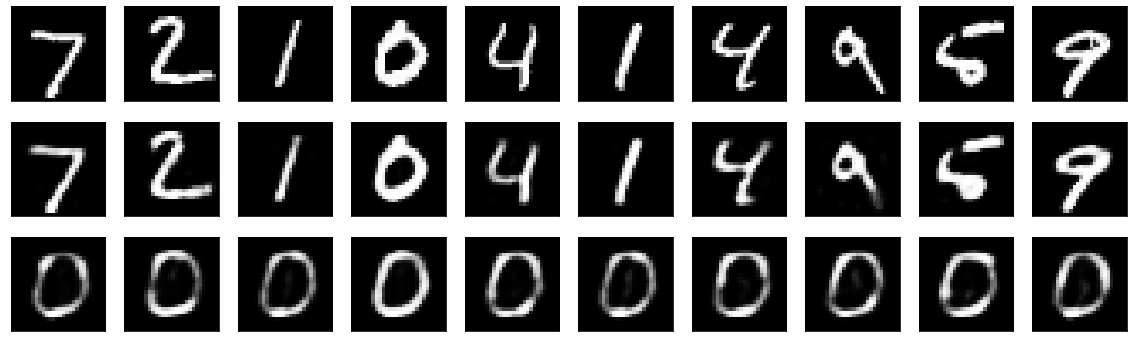

In [0]:
plot_digits(imgs, decoded_imgs, decoded_imgs_with_add)  # взглянем на результаты преобразования

In [0]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n) # преобразовываем декодером обычные картинки
decoded_imgs_with_noise = decoder.predict(encoded_imgs_with_noise, batch_size=n) # преобразовываем декодером зашумленные картинки

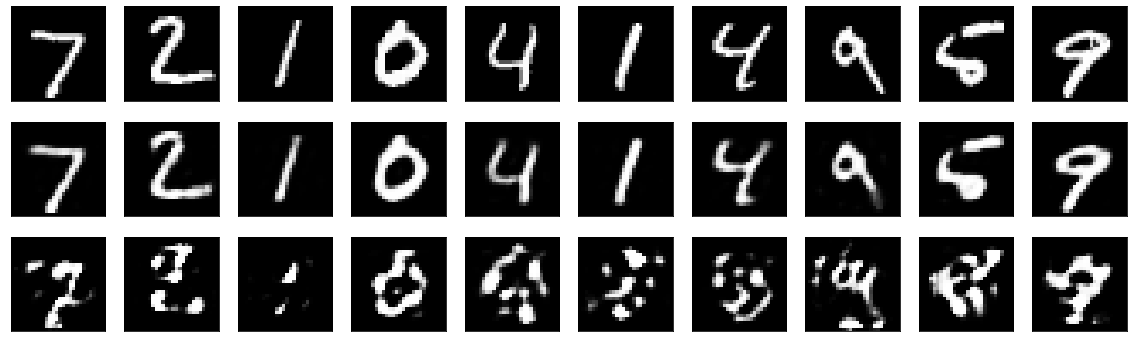

In [0]:
plot_digits(imgs,decoded_imgs, decoded_imgs_with_noise) # взглянем на результаты преобразования